___
# 2.How are in-demand skills trending for Data Analysts?

## Methodology
1.  Aggregate skill counts monthly
2.  Plot the monthly skill counts
3.  Re-analyze based on percentage of total jobs
4.  Plot the monthly skill demand

## Original Exploration
- `12_Exercise_Trending_Skills.ipynb`
___

In [151]:
import ast 
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)  # This converts the string representation to an actual list

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [153]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [154]:
df_DA_Egy=df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Egypt')].copy()

In [155]:
df_DA_Egy['job_posted_month_no']= df_DA_Egy['job_posted_date'].dt.month

In [156]:
df_DA_Egy_explode=df_DA_Egy.explode('job_skills')


In [157]:
df_DA_Egy_pivot= df_DA_Egy_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_Egy_pivot.loc['total']= df_DA_Egy_pivot.sum()
df_DA_Egy_pivot= df_DA_Egy_pivot[df_DA_Egy_pivot.loc['total'].sort_values(ascending=False).index]
df_DA_Egy_pivot= df_DA_Egy_pivot.drop('total')
df_DA_Egy_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,azure,word,...,ibm cloud,jenkins,pytorch,plotly,spring,splunk,svn,unix,terraform,trello
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,21,17,15,14,11,7,0,2,3,1,...,0,0,0,0,0,0,0,0,0,0
2,14,16,14,7,7,4,6,5,6,5,...,0,0,0,0,0,0,0,0,0,0
3,7,12,8,6,7,3,2,5,4,2,...,1,1,0,0,0,0,0,0,1,0
4,9,3,5,6,1,4,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,4,2,3,3,3,1,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,2,5,3,5,4,2,0,2,1,2,...,0,0,0,0,0,0,0,0,0,0
7,13,13,8,6,9,2,0,2,2,3,...,0,0,0,0,0,0,0,0,0,0
8,25,20,16,12,13,2,4,3,1,2,...,0,0,0,0,0,0,0,1,0,1
9,17,9,16,12,12,5,4,2,1,3,...,0,0,1,0,0,0,0,0,0,0


In [158]:
DA_totals= df_DA_Egy.groupby('job_posted_month_no').size()


In [159]:
df_DA_Egy_persent= df_DA_Egy_pivot.div(other=DA_totals/100 ,axis=0)
df_DA_Egy_persent

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,azure,word,...,ibm cloud,jenkins,pytorch,plotly,spring,splunk,svn,unix,terraform,trello
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,50.000000,40.476190,35.714286,33.333333,26.190476,16.666667,0.000000,4.761905,7.142857,2.380952,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,37.837838,43.243243,37.837838,18.918919,18.918919,10.810811,16.216216,13.513514,16.216216,13.513514,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,25.000000,42.857143,28.571429,21.428571,25.000000,10.714286,7.142857,17.857143,14.285714,7.142857,...,3.571429,3.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.571429,0.000000
4,50.000000,16.666667,27.777778,33.333333,5.555556,22.222222,33.333333,0.000000,5.555556,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,36.363636,18.181818,27.272727,27.272727,27.272727,9.090909,18.181818,9.090909,0.000000,9.090909,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,16.666667,41.666667,25.000000,41.666667,33.333333,16.666667,0.000000,16.666667,8.333333,16.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,46.428571,46.428571,28.571429,21.428571,32.142857,7.142857,0.000000,7.142857,7.142857,10.714286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,44.642857,35.714286,28.571429,21.428571,23.214286,3.571429,7.142857,5.357143,1.785714,3.571429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.785714,0.000000,1.785714
9,30.357143,16.071429,28.571429,21.428571,21.428571,8.928571,7.142857,3.571429,1.785714,5.357143,...,0.000000,0.000000,1.785714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [160]:
# changes month number to month name
df_DA_Egy_persent = df_DA_Egy_persent.reset_index()
df_DA_Egy_persent['job_posted_month'] = df_DA_Egy_persent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_Egy_persent = df_DA_Egy_persent.set_index('job_posted_month')
df_DA_Egy_persent = df_DA_Egy_persent.drop(columns='job_posted_month_no')

df_DA_Egy_persent

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,azure,word,...,ibm cloud,jenkins,pytorch,plotly,spring,splunk,svn,unix,terraform,trello
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,50.000000,40.476190,35.714286,33.333333,26.190476,16.666667,0.000000,4.761905,7.142857,2.380952,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,37.837838,43.243243,37.837838,18.918919,18.918919,10.810811,16.216216,13.513514,16.216216,13.513514,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,25.000000,42.857143,28.571429,21.428571,25.000000,10.714286,7.142857,17.857143,14.285714,7.142857,...,3.571429,3.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.571429,0.000000
Apr,50.000000,16.666667,27.777778,33.333333,5.555556,22.222222,33.333333,0.000000,5.555556,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,36.363636,18.181818,27.272727,27.272727,27.272727,9.090909,18.181818,9.090909,0.000000,9.090909,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,16.666667,41.666667,25.000000,41.666667,33.333333,16.666667,0.000000,16.666667,8.333333,16.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,46.428571,46.428571,28.571429,21.428571,32.142857,7.142857,0.000000,7.142857,7.142857,10.714286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,44.642857,35.714286,28.571429,21.428571,23.214286,3.571429,7.142857,5.357143,1.785714,3.571429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.785714,0.000000,1.785714
Sep,30.357143,16.071429,28.571429,21.428571,21.428571,8.928571,7.142857,3.571429,1.785714,5.357143,...,0.000000,0.000000,1.785714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


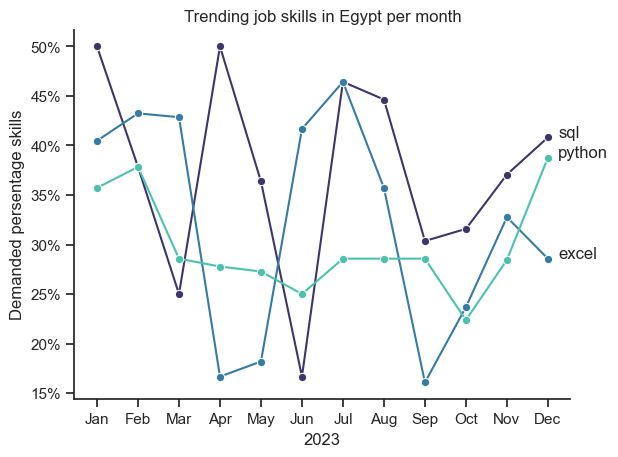

In [186]:
df_plot= df_DA_Egy_persent.iloc[:, :3]

sns.lineplot(data=df_plot, dashes=False, palette='mako',marker='o', markersize=6)
sns.despine()

plt.title('Trending job skills in Egypt per month')
plt.xlabel('2023')
plt.ylabel('Demanded persentage skills')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax= plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(3):
    plt.text(11.25, df_plot.iloc[-1, i], df_plot.columns[i])